In [3]:
import pandas as pd
import seaborn as sb

# Load the data
df = pd.read_csv('shipment.csv')
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [6]:
# Filter for California and Standard Class
df2 = df[(df['State'] == 'California') & (df['Ship Mode'] == 'Standard Class')].copy()
df2.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
5,6,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860
6,7,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280
7,8,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152
8,9,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504
9,10,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900


In [16]:
# Remove decimals from postal codes
df2['Postal Code'] = df2['Postal Code'].astype(str).str.split('.').str.get(0)

# Drop unnecessary columns
df2.drop(columns=['Region', 'Row ID'], inplace=True)

df2.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Product ID,Category,Sub-Category,Product Name,Sales
5,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860
6,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280
7,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152
8,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504
9,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900


In [18]:
# Check for null values
print(df2.isna().sum())

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64


In [19]:
# Check for duplicates
print(df2.duplicated().sum())

0


In [21]:
# Reset the index
df2.reset_index(drop=True, inplace=True)
df2.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860
1,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280
2,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152
3,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504
4,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900


In [22]:
# Add Order_Year and Month columns for visualization
df2['Order_Year'] = df2['Order Date'].astype(str).str.split('/').str[2]
df2['Month'] = df2['Order Date'].astype(str).str.split('/').str[1]

df2.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Product ID,Category,Sub-Category,Product Name,Sales,Order_Year,Month
0,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,2015,6
1,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,2015,6
2,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,2015,6
3,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,2015,6
4,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,2015,6


C:\Users\taghi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Order_Year', ylabel='Count'>

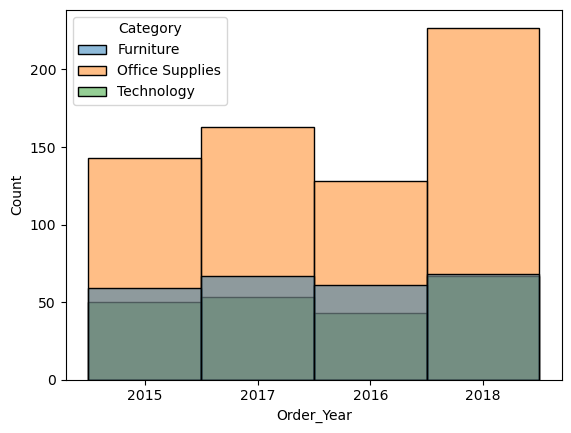

In [23]:
# Visualize the comparison of the number of sold categories in different years
sb.histplot(data=df2, x='Order_Year', hue='Category')

<Axes: xlabel='Order_Year', ylabel='Sales'>

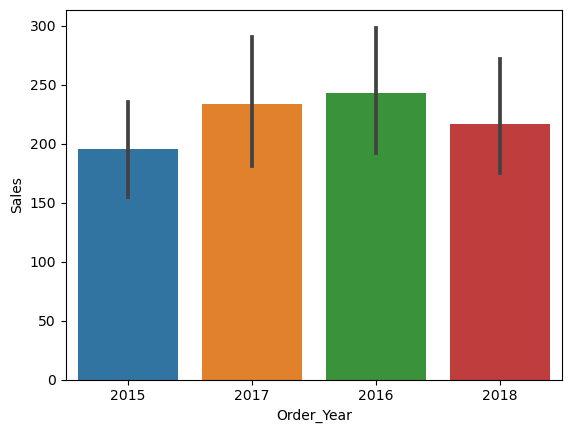

In [24]:
# Visualize the amount of sales over years
sb.barplot(data=df2, x='Order_Year', y='Sales')

In [25]:
# Find which category sells the best
best_selling_category = df2.groupby('Category')['Sales'].sum()
print(best_selling_category)

Category
Furniture          87309.6115
Office Supplies    77569.0300
Technology         85419.4540
Name: Sales, dtype: float64


In [26]:
# Find the best selling month on average
best_selling_month = df2.groupby('Month')['Sales'].mean()
print(best_selling_month)

Month
01    194.895400
02    106.437833
03    200.303950
04    178.480561
05    257.190606
06    142.292125
07    262.456744
08    240.725311
09    193.242466
1     346.046000
10    237.269000
11    196.917667
12    240.098609
2     210.692375
3     253.077520
4     199.973200
5     228.611421
6     343.287067
7     187.293679
8     273.700000
9     206.723685
Name: Sales, dtype: float64
